ANGGOTA 1

Nama : Sya Raihan Heggi 

NIM : 1301184219

Kelas : IF-42-03

ANGGOTA 2 

Nama : Indra Wahyudi

NIM : 1301184366

Kelas : IF-42-03

In [1]:
import pandas as pd 
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import math 

In [2]:
df_train = pd.read_csv('salju_train.csv')
df_test = pd.read_csv('salju_test.csv')

In [3]:
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [4]:
df_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


** Perlu Drop Atribut ID pada Train karena tidak diperlukan 

**Check Shape**

In [5]:
df_train.shape

(109095, 24)

In [6]:
df_test.shape

(18182, 23)

**Check Info Dataset**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

** Ada Kemungkinan Nantinya Data Akan Mengalami Transformasi dalam hal ini nantinya Tanggal, Kode Lokasi, Arah Angin, Bersalju Hari ini , atau Bersalju Besok

**Check Missing Value** 

In [9]:
df_train.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [10]:
df_test.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

**Check Duplicate Value**

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

**Value Count**

Mengecek apakah ada anomali dari input data yang masuk 

In [13]:
df_train['Tanggal'].value_counts()

31/03/2017    45
05/12/2013    45
02/06/2017    45
15/08/2014    45
14/09/2016    45
              ..
23/05/2008     1
22/01/2008     1
24/11/2007     1
19/05/2008     1
22/11/2007     1
Name: Tanggal, Length: 3414, dtype: int64

In [14]:
df_train['KodeLokasi'].value_counts()

C1     2598
C2     2532
C7     2442
C8     2420
C3     2419
C5     2383
C6     2371
C4     2366
C38    2331
C20    2308
C23    2307
C18    2304
C21    2298
C12    2293
C35    2292
C25    2290
C45    2287
C22    2282
C17    2278
C37    2277
C13    2277
C40    2273
C28    2269
C9     2268
C26    2268
C41    2265
C14    2265
C15    2264
C46    2264
C27    2262
C11    2254
C10    2250
C43    2249
C33    2247
C31    2244
C36    2243
C34    2241
C44    2239
C16    2236
C32    2233
C30    2230
C39    2227
C29    2221
C42    2217
C19    2215
C24    2213
C49    1210
C47    1198
C48    1175
Name: KodeLokasi, dtype: int64

In [15]:
df_train['SuhuMin'].value_counts()

 11.0    685
 10.2    678
 9.6     666
 10.5    664
 10.0    661
        ... 
-7.6       1
-8.5       1
 29.5      1
-7.3       1
 31.8      1
Name: SuhuMin, Length: 384, dtype: int64

In [16]:
df_train['SuhuMax'].value_counts()

 20.0    667
 19.0    632
 19.8    628
 20.4    627
 21.0    626
        ... 
-2.5       1
-2.7       1
-2.3       1
-4.1       1
-2.4       1
Name: SuhuMax, Length: 497, dtype: int64

In [17]:
df_train['Hujan'].value_counts()

0.0      68152
0.2       6637
0.4       2826
0.6       1954
0.8       1543
         ...  
90.0         1
148.6        1
145.6        1
97.0         1
155.0        1
Name: Hujan, Length: 632, dtype: int64

In [18]:
df_train['Penguapan'].value_counts()

4.0     2496
8.0     1921
2.2     1559
1.8     1528
2.4     1523
        ... 
15.1       1
57.6       1
19.3       1
77.3       1
46.8       1
Name: Penguapan, Length: 329, dtype: int64

In [19]:
df_train['SinarMatahari'].value_counts()

0.0     1784
11.0     811
10.8     810
10.7     808
10.3     776
        ... 
13.9      15
14.0       9
14.1       5
14.2       2
14.3       2
Name: SinarMatahari, Length: 144, dtype: int64

In [20]:
df_train['ArahAnginTerkencang'].value_counts()

W      7491
SE     7078
N      6955
S      6931
E      6902
SSE    6882
WSW    6824
SW     6656
SSW    6495
WNW    6202
ENE    6125
NW     6087
ESE    5429
NE     5342
NNW    5025
NNE    4927
Name: ArahAnginTerkencang, dtype: int64

In [21]:
df_train['ArahAngin9am'].value_counts()

N      8820
SE     6986
E      6877
SSE    6829
NW     6625
S      6423
W      6339
SW     6306
NNE    6142
NNW    6018
ENE    5890
NE     5713
SSW    5689
ESE    5676
WNW    5572
WSW    5267
Name: ArahAngin9am, dtype: int64

In [22]:
df_train['ArahAngin3pm'].value_counts()

SE     8204
W      7631
S      7479
WSW    7076
SSE    7015
SW     7002
WNW    6682
N      6678
NW     6456
E      6345
ESE    6333
NE     6222
SSW    6057
NNW    5905
ENE    5883
NNE    4930
Name: ArahAngin3pm, dtype: int64

In [23]:
df_train['KecepatanAngin9am'].value_counts()

9.0      10173
13.0      9908
11.0      8780
7.0       8113
15.0      8018
17.0      8017
6.0       6837
19.0      6585
0.0       6532
20.0      5976
4.0       4798
22.0      4201
24.0      4163
2.0       3450
26.0      2775
28.0      2707
30.0      1782
31.0      1548
33.0       845
35.0       721
37.0       445
39.0       321
41.0       256
43.0       210
44.0       153
46.0       141
48.0        62
50.0        62
52.0        46
56.0        34
54.0        29
57.0        20
63.0         8
61.0         5
65.0         5
74.0         4
59.0         4
67.0         3
87.0         2
69.0         2
130.0        1
Name: KecepatanAngin9am, dtype: int64

In [24]:
df_train['KecepatanAngin3pm'].value_counts()

17.0    9378
13.0    9323
20.0    8806
15.0    8643
19.0    8495
11.0    7469
9.0     7346
24.0    6832
22.0    6344
28.0    4919
26.0    4877
7.0     4423
30.0    3453
31.0    2983
6.0     2833
33.0    1871
4.0     1703
35.0    1630
37.0    1034
39.0     861
0.0      855
2.0      788
41.0     518
43.0     417
44.0     269
46.0     227
50.0     139
48.0     123
52.0      68
54.0      51
56.0      38
57.0      22
61.0      11
63.0      11
59.0      11
65.0      11
69.0       3
76.0       2
72.0       1
78.0       1
74.0       1
87.0       1
67.0       1
Name: KecepatanAngin3pm, dtype: int64

In [25]:
df_train['Kelembaban9am'].value_counts()

99.0    2521
68.0    2278
65.0    2276
69.0    2275
70.0    2251
        ... 
4.0       15
2.0        7
3.0        6
1.0        3
0.0        1
Name: Kelembaban9am, Length: 101, dtype: int64

In [26]:
df_train['Kelembaban3pm'].value_counts()

57.0    2073
52.0    2070
59.0    2062
55.0    2055
58.0    1987
        ... 
4.0       78
3.0       42
2.0       27
1.0       23
0.0        3
Name: Kelembaban3pm, Length: 101, dtype: int64

In [27]:
df_train['Tekanan9am'].value_counts()

1016.4    595
1017.3    590
1016.3    587
1018.7    583
1017.9    580
         ... 
986.2       1
989.8       1
1040.5      1
1040.0      1
986.6       1
Name: Tekanan9am, Length: 537, dtype: int64

In [28]:
df_train['Tekanan3pm'].value_counts()

1013.5    587
1015.5    583
1015.3    582
1015.4    580
1014.8    575
         ... 
1038.5      1
1038.0      1
1037.5      1
986.4       1
982.6       1
Name: Tekanan3pm, Length: 539, dtype: int64

In [29]:
df_train['Awan9am'].value_counts()

7.0    15040
1.0    11792
8.0    11014
0.0     6427
6.0     6117
2.0     4879
3.0     4459
5.0     4204
4.0     3317
9.0        2
Name: Awan9am, dtype: int64

In [30]:
df_train['Awan3pm'].value_counts()

7.0    13660
1.0    11258
8.0     9567
6.0     6732
2.0     5448
3.0     5156
5.0     5100
4.0     4043
0.0     3659
9.0        1
Name: Awan3pm, dtype: int64

In [31]:
df_train['Suhu9am'].value_counts()

 16.0    682
 15.0    669
 17.0    668
 13.8    664
 14.8    663
        ... 
 39.0      1
-4.9       1
 36.6      1
-3.5       1
-6.2       1
Name: Suhu9am, Length: 435, dtype: int64

In [32]:
df_train['Suhu3pm'].value_counts()

 20.0    662
 17.8    653
 18.5    651
 18.4    647
 19.0    645
        ... 
 45.0      1
 43.6      1
-4.2       1
-5.1       1
 44.3      1
Name: Suhu3pm, Length: 500, dtype: int64

In [33]:
df_train['BersaljuHariIni'].value_counts()

Tidak    82670
Ya       23994
Name: BersaljuHariIni, dtype: int64

In [34]:
df_train['BersaljuBesok'].value_counts()

Tidak    82701
Ya       23963
Name: BersaljuBesok, dtype: int64

Tidak Ada Anomali atau Wrong Input Values pada Dataset Train

**Visualisasi Count**

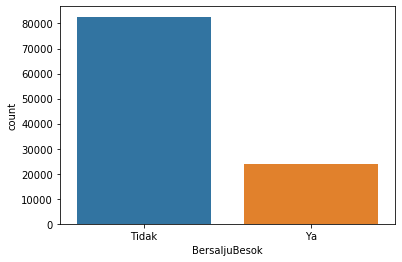

In [35]:
sn.countplot(x = df_train['BersaljuBesok'])

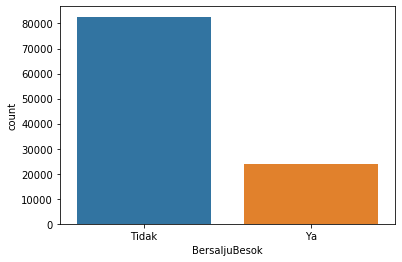

In [36]:
sn.countplot(x = df_train['BersaljuBesok'])

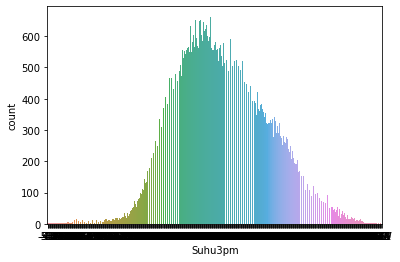

In [37]:
sn.countplot(x=df_train['Suhu3pm'])

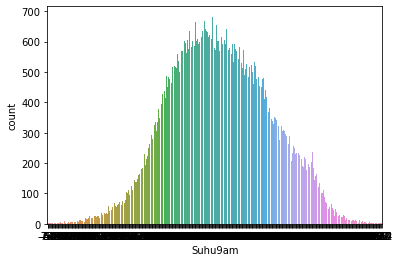

In [38]:
sn.countplot(x=df_train['Suhu9am'])

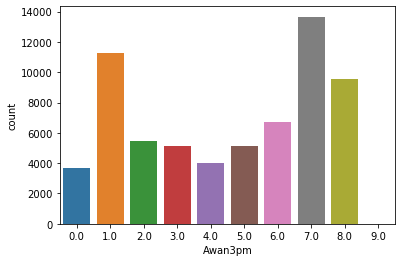

In [39]:
sn.countplot(x=df_train['Awan3pm'])

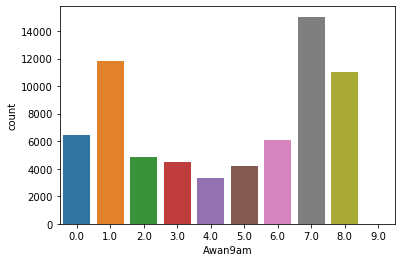

In [40]:
sn.countplot(x=df_train['Awan9am'])

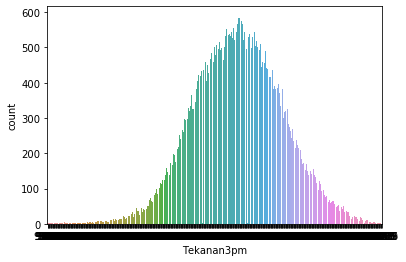

In [41]:
sn.countplot(x=df_train['Tekanan3pm'])

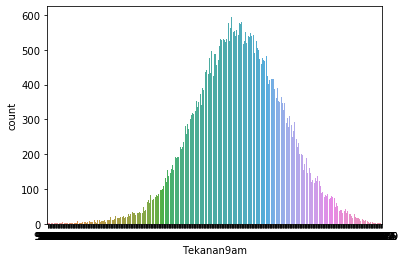

In [42]:
sn.countplot(x=df_train['Tekanan9am'])

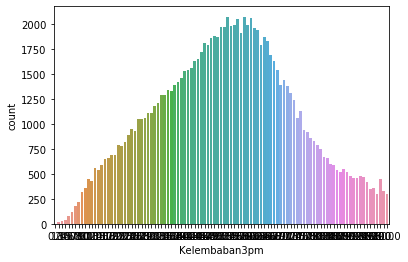

In [43]:
sn.countplot(x=df_train['Kelembaban3pm'])

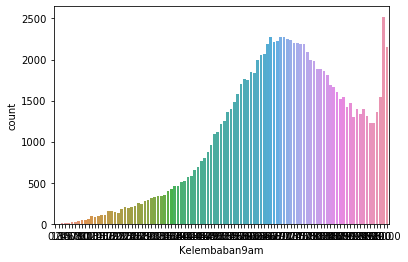

In [44]:
sn.countplot(x=df_train['Kelembaban9am'])

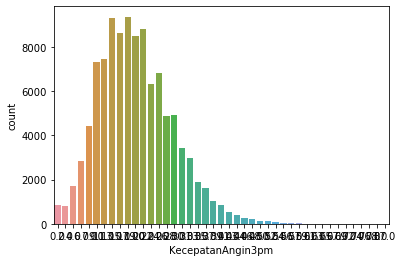

In [45]:
sn.countplot(x=df_train['KecepatanAngin3pm'])

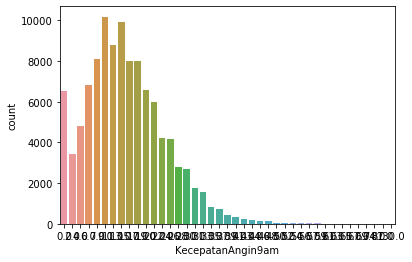

In [46]:
sn.countplot(x=df_train['KecepatanAngin9am'])

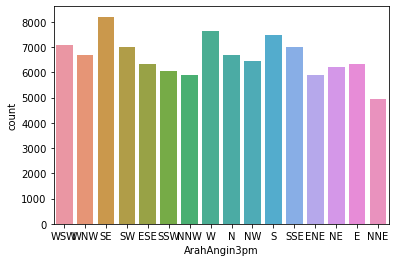

In [47]:
sn.countplot(x=df_train['ArahAngin3pm'])

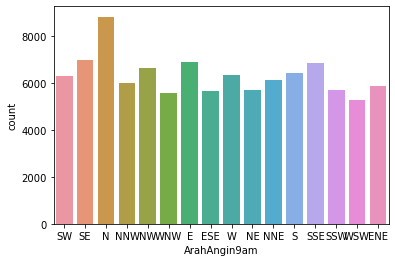

In [48]:
sn.countplot(x=df_train['ArahAngin9am'])

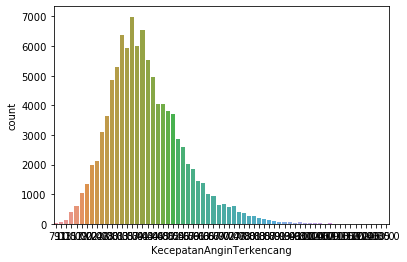

In [49]:
sn.countplot(x=df_train['KecepatanAnginTerkencang'])

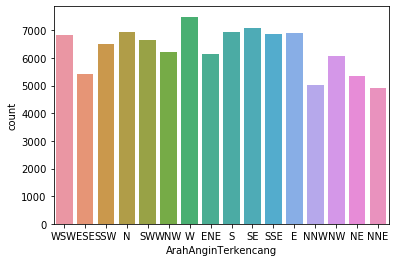

In [50]:
sn.countplot(x=df_train['ArahAnginTerkencang'])

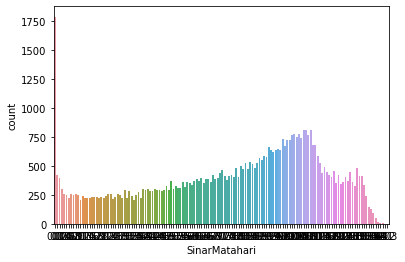

In [51]:
sn.countplot(x=df_train['SinarMatahari'])

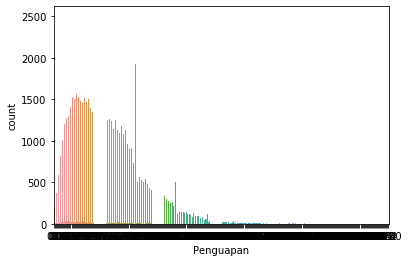

In [52]:
sn.countplot(x=df_train['Penguapan'])

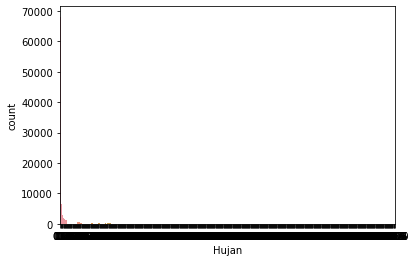

In [53]:
sn.countplot(x=df_train['Hujan'])

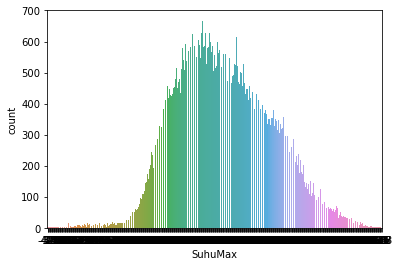

In [54]:
sn.countplot(x=df_train['SuhuMax'])

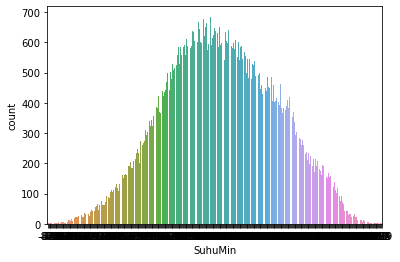

In [55]:
sn.countplot(x=df_train['SuhuMin'])

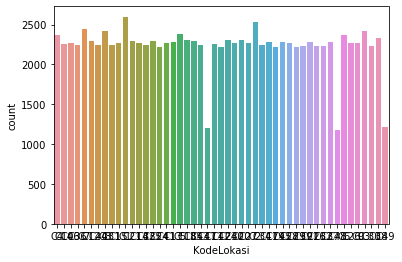

In [56]:
sn.countplot(x=df_train['KodeLokasi'])

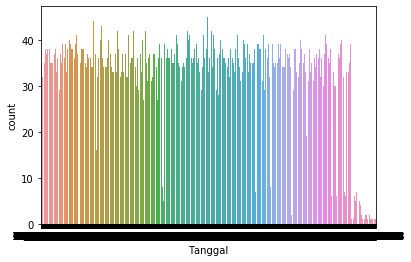

In [57]:
sn.countplot(x=df_train['Tanggal'])

**Impute Missing Value** 

** Untuk Menangani Nilai Missing Akan dilakukan Replace atau Impute dengan Nilai Mean/Median/Modus , untuk tipe data non-numeric kemungkinan akan di replace hanya dengan modus saja.

In [58]:
df_train.skew()

id                           0.000000
SuhuMin                      0.018027
SuhuMax                      0.220794
Hujan                       10.059372
Penguapan                    3.916398
SinarMatahari               -0.493987
KecepatanAnginTerkencang     0.875967
KecepatanAngin9am            0.783795
KecepatanAngin3pm            0.622092
Kelembaban9am               -0.481203
Kelembaban3pm                0.033181
Tekanan9am                  -0.098483
Tekanan3pm                  -0.049309
Awan9am                     -0.230423
Awan3pm                     -0.227323
Suhu9am                      0.085140
Suhu3pm                      0.238056
dtype: float64

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

**TRAIN DATA**

In [60]:
df_train['Tanggal'].fillna(df_train['Tanggal'].mode().iloc[0], inplace=True)
df_train['KodeLokasi'].fillna(df_train['KodeLokasi'].mode().iloc[0], inplace=True)
df_train['ArahAnginTerkencang'].fillna(df_train['ArahAnginTerkencang'].mode().iloc[0], inplace=True)
df_train['ArahAngin9am'].fillna(df_train['ArahAngin9am'].mode().iloc[0], inplace=True)
df_train['ArahAngin3pm'].fillna(df_train['ArahAngin3pm'].mode().iloc[0], inplace=True)
df_train['BersaljuHariIni'].fillna(df_train['BersaljuHariIni'].mode().iloc[0], inplace=True)
df_train['BersaljuBesok'].fillna(df_train['BersaljuBesok'].mode().iloc[0], inplace=True)

In [61]:
df_train['SuhuMin'].fillna(df_train['SuhuMin'].mean(), inplace=True)
df_train['SuhuMax'].fillna(df_train['SuhuMax'].mean(), inplace=True)
df_train['Hujan'].fillna(df_train['Hujan'].mean(), inplace=True)
df_train['Penguapan'].fillna(df_train['Penguapan'].mean(), inplace=True)
df_train['SinarMatahari'].fillna(df_train['SinarMatahari'].mean(), inplace=True)
df_train['KecepatanAnginTerkencang'].fillna(df_train['KecepatanAnginTerkencang'].mean(), inplace=True)
df_train['KecepatanAngin9am'].fillna(df_train['KecepatanAngin9am'].mean(), inplace=True)
df_train['KecepatanAngin3pm'].fillna(df_train['KecepatanAngin3pm'].mean(), inplace=True)
df_train['Tekanan9am'].fillna(df_train['Tekanan9am'].mean(), inplace=True)
df_train['Tekanan3pm'].fillna(df_train['Tekanan3pm'].mean(), inplace=True)
df_train['Kelembaban9am'].fillna(df_train['Kelembaban9am'].mean(), inplace=True)
df_train['Kelembaban3pm'].fillna(df_train['Kelembaban3pm'].mean(), inplace=True)
df_train['Awan9am'].fillna(df_train['Awan9am'].mean(), inplace=True)
df_train['Awan3pm'].fillna(df_train['Awan3pm'].mean(), inplace=True)
df_train['Suhu9am'].fillna(df_train['Suhu9am'].mean(), inplace=True)
df_train['Suhu3pm'].fillna(df_train['Suhu3pm'].mean(), inplace=True)

**TEST DATA**

In [62]:
df_test['Tanggal'].fillna(df_test['Tanggal'].mode().iloc[0], inplace=True)
df_test['KodeLokasi'].fillna(df_test['KodeLokasi'].mode().iloc[0], inplace=True)
df_test['ArahAnginTerkencang'].fillna(df_train['ArahAnginTerkencang'].mode().iloc[0], inplace=True)
df_test['ArahAngin9am'].fillna(df_test['ArahAngin9am'].mode().iloc[0], inplace=True)
df_test['ArahAngin3pm'].fillna(df_test['ArahAngin3pm'].mode().iloc[0], inplace=True)
df_test['BersaljuHariIni'].fillna(df_test['BersaljuHariIni'].mode().iloc[0], inplace=True)
df_test['BersaljuBesok'].fillna(df_test['BersaljuBesok'].mode().iloc[0], inplace=True)

In [63]:
df_test['SuhuMin'].fillna(df_test['SuhuMin'].mean(), inplace=True)
df_test['SuhuMax'].fillna(df_test['SuhuMax'].mean(), inplace=True)
df_test['Hujan'].fillna(df_test['Hujan'].mean(), inplace=True)
df_test['Penguapan'].fillna(df_test['Penguapan'].mean(), inplace=True)
df_test['SinarMatahari'].fillna(df_test['SinarMatahari'].mean(), inplace=True)
df_test['KecepatanAnginTerkencang'].fillna(df_test['KecepatanAnginTerkencang'].mean(), inplace=True)
df_test['KecepatanAngin9am'].fillna(df_test['KecepatanAngin9am'].mean(), inplace=True)
df_test['KecepatanAngin3pm'].fillna(df_test['KecepatanAngin3pm'].mean(), inplace=True)
df_test['Tekanan9am'].fillna(df_test['Tekanan9am'].mean(), inplace=True)
df_test['Tekanan3pm'].fillna(df_test['Tekanan3pm'].mean(), inplace=True)
df_test['Kelembaban9am'].fillna(df_test['Kelembaban9am'].mean(), inplace=True)
df_test['Kelembaban3pm'].fillna(df_test['Kelembaban3pm'].mean(), inplace=True)
df_test['Awan9am'].fillna(df_test['Awan9am'].mean(), inplace=True)
df_test['Awan3pm'].fillna(df_test['Awan3pm'].mean(), inplace=True)
df_test['Suhu9am'].fillna(df_test['Suhu9am'].mean(), inplace=True)
df_test['Suhu3pm'].fillna(df_test['Suhu3pm'].mean(), inplace=True)

In [64]:
df_train.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [65]:
df_test.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

**Drop Duplicate Values**

Melakukan Drop Nilai Duplicate yang ada di data training dan data testing

In [66]:
df_train.drop_duplicates(keep=False,inplace=True)
df_test.drop_duplicates(keep=False,inplace=True)

In [67]:
df_train.duplicated().sum()

0

In [68]:
df_test.duplicated().sum()

0

**Data Transformation**

Melakukan transformasi data kategorial/nominal menjadi nilai numerik agar dapat diproses untuk beberapa algoritma yang sensitif terhadap jenis data dalam hal ini seperti Naive Bayes.

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [70]:
le = LabelEncoder()
df_train['Tanggal'] = le.fit_transform(df_train['Tanggal'])
df_train['KodeLokasi'] = le.fit_transform(df_train['KodeLokasi'])
df_train['ArahAnginTerkencang'] = le.fit_transform(df_train['ArahAnginTerkencang'])
df_train['ArahAngin9am'] = le.fit_transform(df_train['ArahAngin9am'])
df_train['ArahAngin3pm'] = le.fit_transform(df_train['ArahAngin3pm'])
df_train['BersaljuHariIni'] = le.fit_transform(df_train['BersaljuHariIni'])
df_train['BersaljuBesok'] = le.fit_transform(df_train['BersaljuBesok'])

In [71]:
df_test['Tanggal'] = le.fit_transform(df_test['Tanggal'])
df_test['KodeLokasi'] = le.fit_transform(df_test['KodeLokasi'])
df_test['ArahAnginTerkencang'] = le.fit_transform(df_test['ArahAnginTerkencang'])
df_test['ArahAngin9am'] = le.fit_transform(df_test['ArahAngin9am'])
df_test['ArahAngin3pm'] = le.fit_transform(df_test['ArahAngin3pm'])
df_test['BersaljuHariIni'] = le.fit_transform(df_test['BersaljuHariIni'])
df_test['BersaljuBesok'] = le.fit_transform(df_test['BersaljuBesok'])

In [72]:
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,53,33,10.4,15.5,4.8,5.46244,7.599527,15,24.000000,...,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,1,0
1,2,1632,1,9.0,17.0,8.0,2.60000,7.400000,13,40.032002,...,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,1,1
2,3,1693,40,18.2,32.0,0.0,5.46244,7.599527,2,44.000000,...,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,0,0
3,4,857,29,7.3,24.5,0.0,8.40000,10.400000,11,54.000000,...,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,0,0
4,5,3226,46,5.9,20.3,0.0,3.60000,12.600000,3,37.000000,...,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,0,0


In [73]:
df_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,400,32,11.0,27.5,0.0,5.509646,6.400000,15,46.0,13,...,39.0,56.0,1013.00000,1012.400000,4.00000,7.000000,25.7,23.6,0,0
1,2612,28,10.0,19.9,0.2,5.509646,7.630135,14,56.0,13,...,76.0,32.0,1017.00000,1015.200000,8.00000,1.000000,10.7,18.9,0,1
2,2200,9,9.2,27.2,0.0,5.200000,10.400000,11,33.0,4,...,89.0,27.0,1018.60000,1015.700000,0.00000,1.000000,13.9,26.3,0,0
3,929,24,17.7,27.0,0.0,4.600000,6.700000,12,35.0,0,...,55.0,41.0,1010.20000,1008.600000,7.00000,6.000000,22.3,26.4,0,0
4,2013,5,2.3,7.9,88.0,5.509646,7.630135,7,46.0,13,...,98.0,95.0,1017.56166,1015.181064,4.44982,4.498322,4.4,6.0,1,0


**Check Correlation**

Cek Korelasi dan Visualisasikan dengan Heatmap agar mudah melihat data mana yang berkorelasi dengan atribut target BersaljuBesok

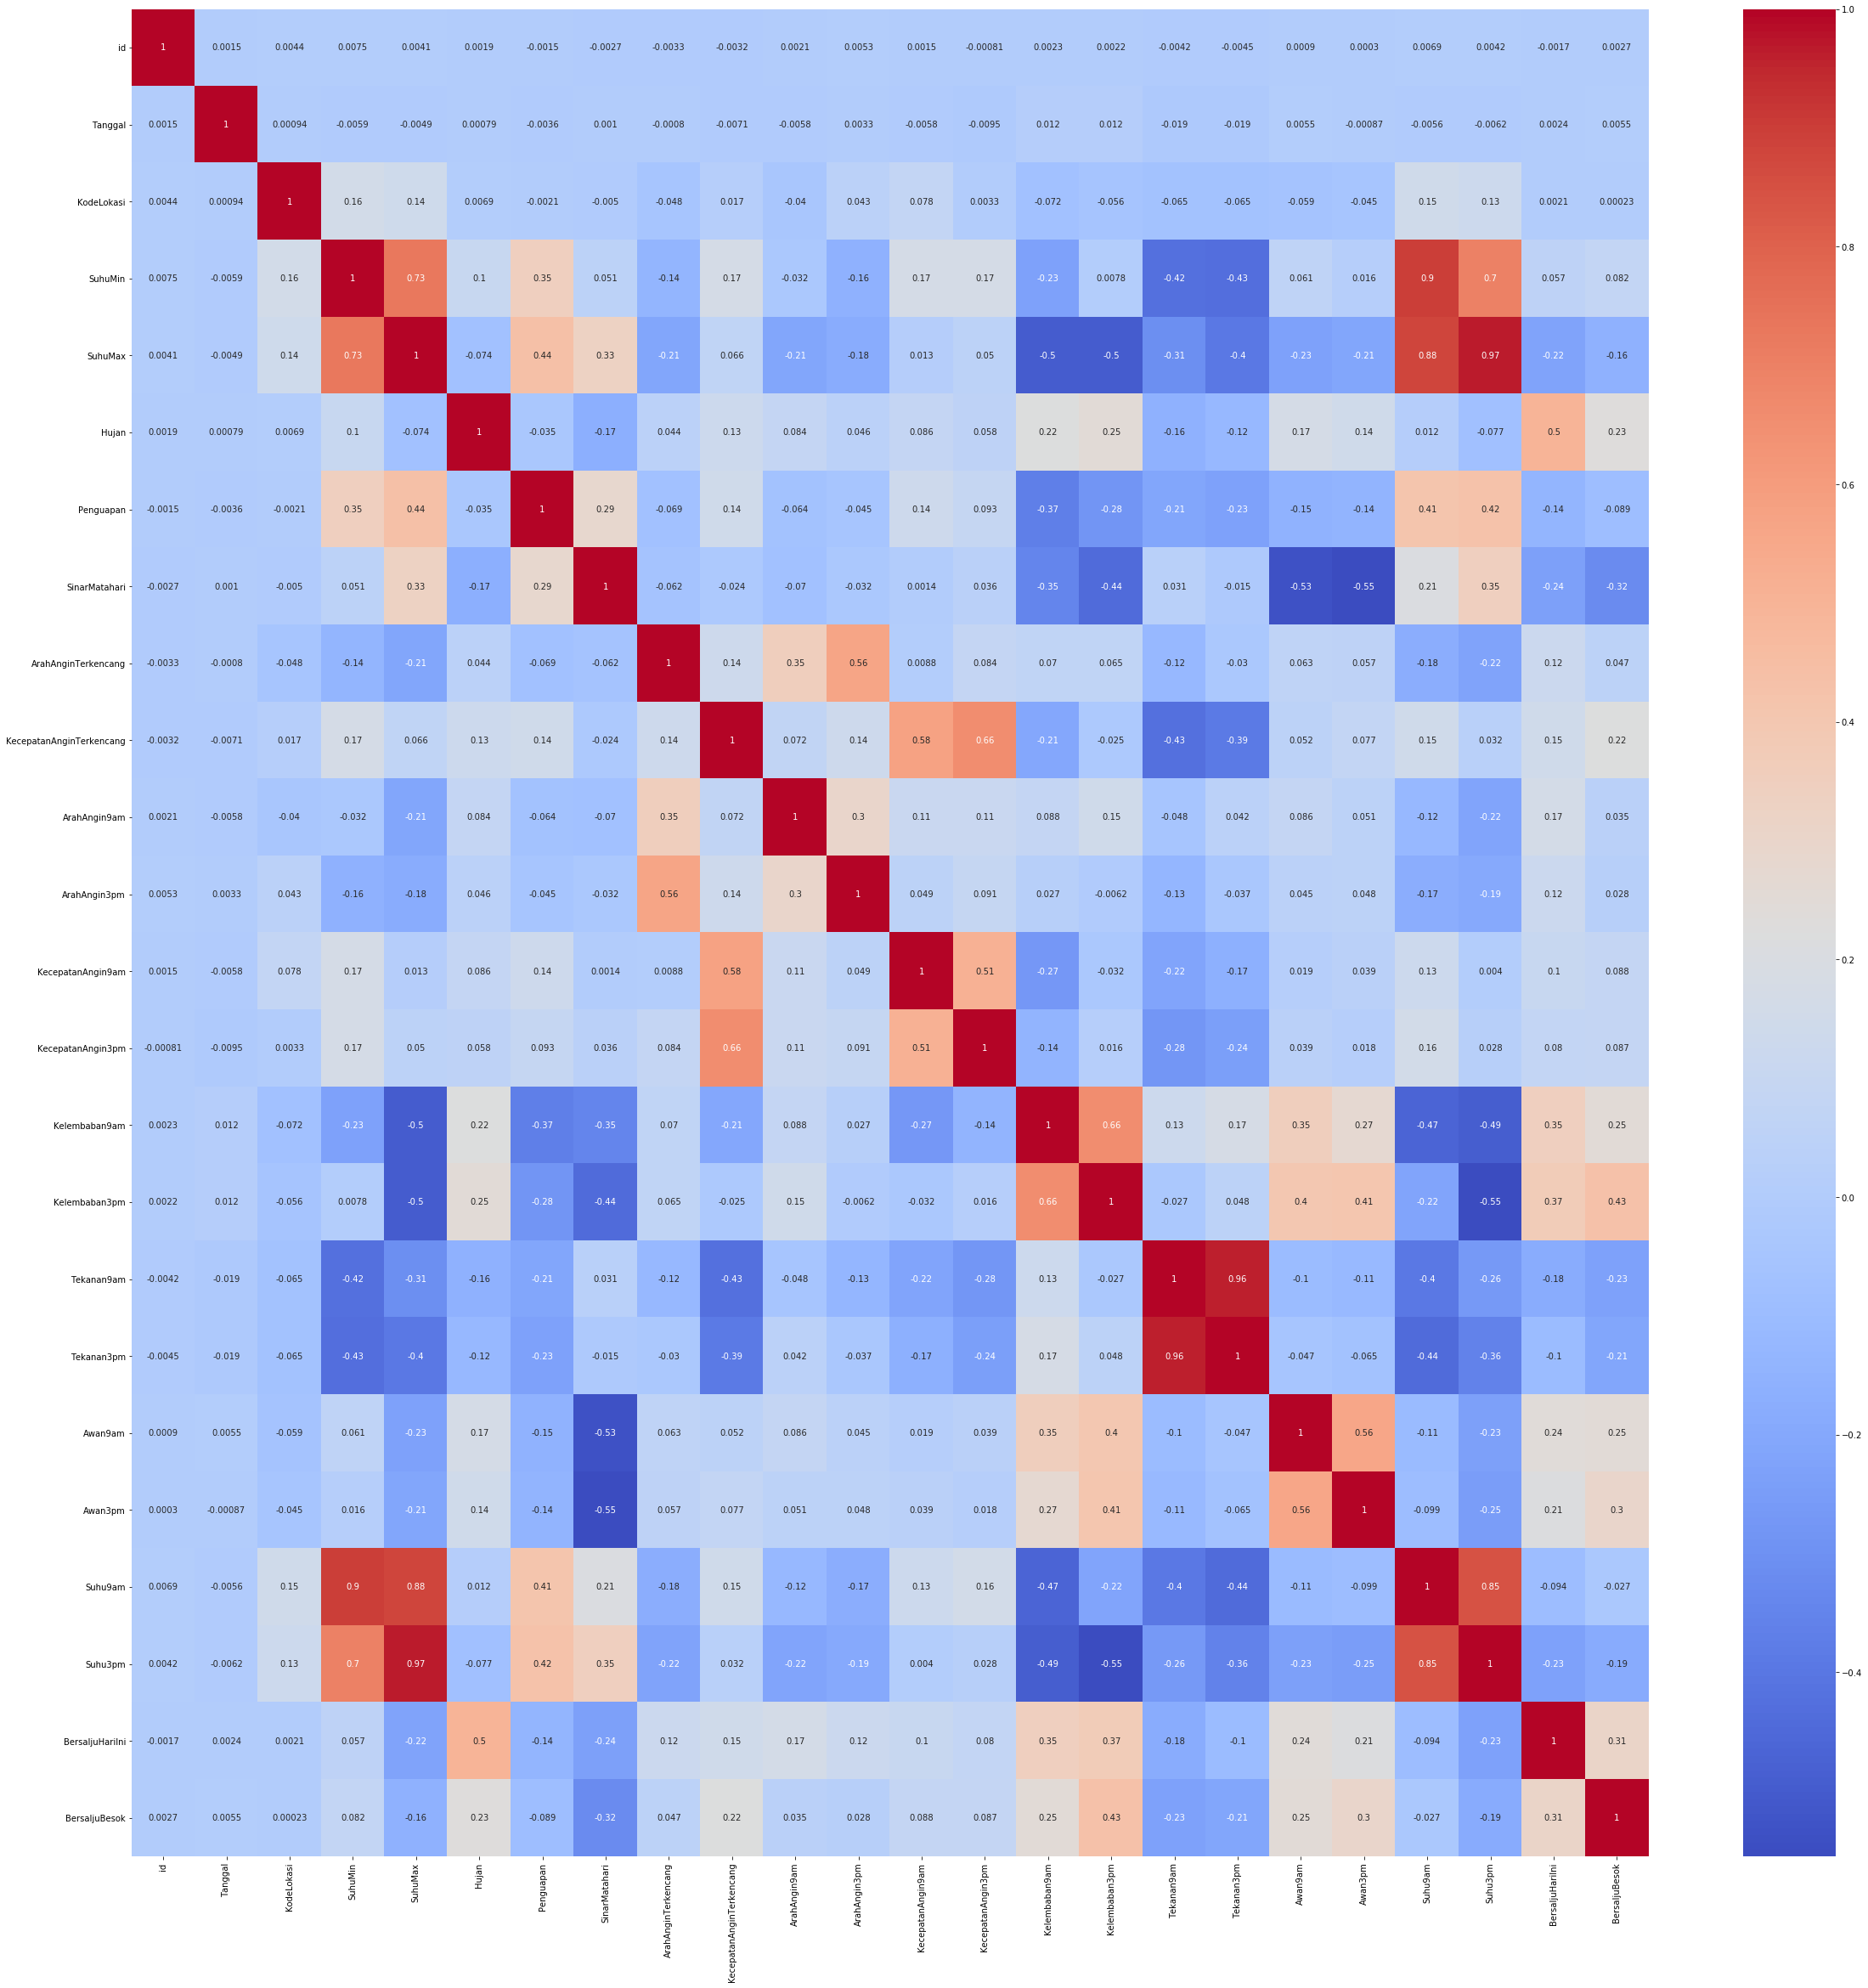

In [74]:
fig = plt.figure(figsize=(40,40))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix, cmap='coolwarm',annot=True)
plt.show()

** Atribut yang akan diambil ['SuhuMin','SuhuMax','SinarMatahari',
'Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm',
'Hujan','KecepatanAnginTerkencang','BersaljuBesok']**

In [75]:
df_train_final = df_train[['SuhuMin','SuhuMax','SinarMatahari','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang','BersaljuBesok']].copy() 
df_test_final = df_test[['SuhuMin','SuhuMax','SinarMatahari','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang','BersaljuBesok']].copy()

In [76]:
df_train_final.head()

,SuhuMin,SuhuMax,SinarMatahari,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,BersaljuBesok
0,10.4,15.5,7.599527,78.0,76.0,1,4.450893,4.51614,4.8,24.000000,0
1,9.0,17.0,7.400000,80.0,61.0,1,7.000000,5.00000,8.0,40.032002,1
2,18.2,32.0,7.599527,62.0,42.0,0,4.450893,4.51614,0.0,44.000000,0
3,7.3,24.5,10.400000,25.0,17.0,0,1.000000,7.00000,0.0,54.000000,0
4,5.9,20.3,12.600000,55.0,48.0,0,2.000000,6.00000,0.0,37.000000,0


In [77]:
df_test_final.head()

,SuhuMin,SuhuMax,SinarMatahari,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,BersaljuBesok
0,11.0,27.5,6.400000,39.0,56.0,0,4.00000,7.000000,0.0,46.0,0
1,10.0,19.9,7.630135,76.0,32.0,0,8.00000,1.000000,0.2,56.0,1
2,9.2,27.2,10.400000,89.0,27.0,0,0.00000,1.000000,0.0,33.0,0
3,17.7,27.0,6.700000,55.0,41.0,0,7.00000,6.000000,0.0,35.0,0
4,2.3,7.9,7.630135,98.0,95.0,1,4.44982,4.498322,88.0,46.0,0


**Handling Outliers and Remove Outliers** 

Akan melakukan handling outlier dengan melakukan drop, namun untuk mengkonfirmasi hasil heatmap sebelum bisa melihat heatmap lagi yang lebih kecil/sedikit atributnya sehingga annotationnya bisa terlihat 

**Train Data**

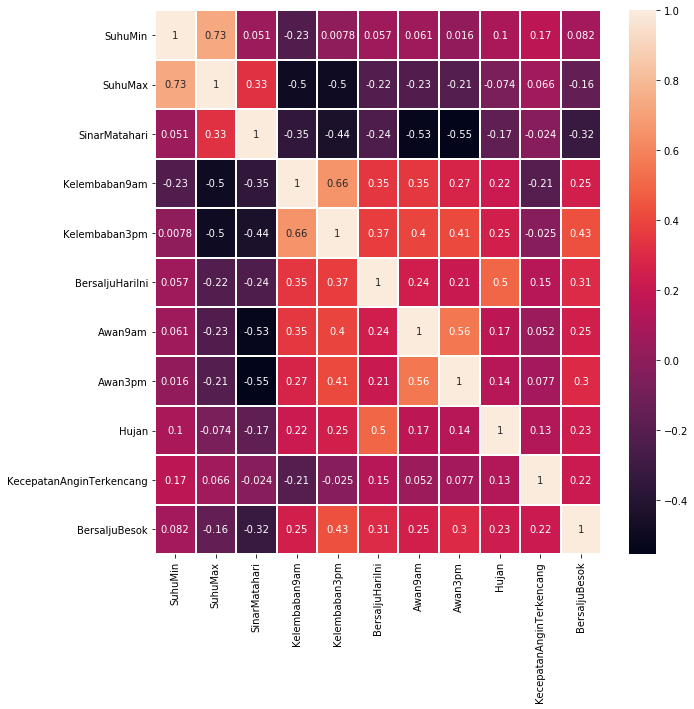

In [78]:
fig = plt.figure(figsize=(10,10))
corrMatrix = df_train_final.corr()
sn.heatmap(corrMatrix, annot=True,linewidths=1)
plt.show()

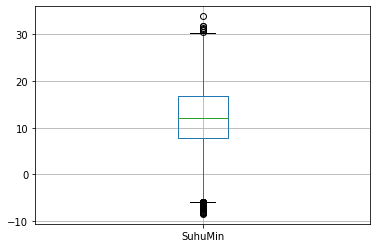

In [79]:
df_train_final.boxplot(column = ['SuhuMin'])

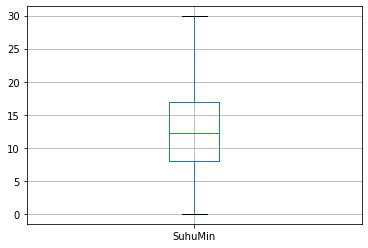

In [80]:
df_train_final.drop(df_train_final[((df_train_final['SuhuMin'] > 30) | (df_train_final['SuhuMin'] < 0))].index ,inplace =True)
df_train_final.boxplot(column = ['SuhuMin'])

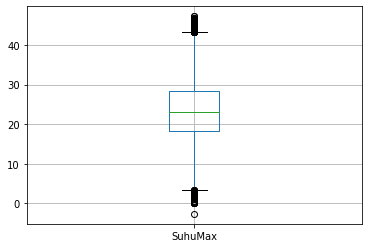

In [81]:
df_train_final.boxplot(column = ['SuhuMax'])

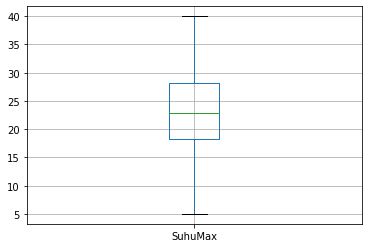

In [82]:
df_train_final.drop(df_train_final[((df_train_final['SuhuMax'] > 40) | (df_train_final['SuhuMax'] < 5))].index ,inplace =True)
df_train_final.boxplot(column = ['SuhuMax'])

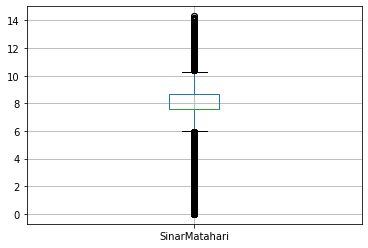

In [83]:
df_train_final.boxplot(column = ['SinarMatahari'])

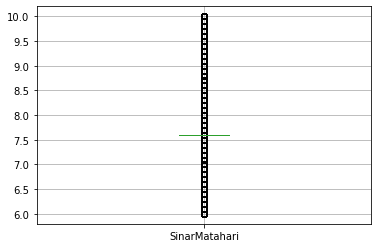

In [84]:
df_train_final.drop(df_train_final[((df_train_final['SinarMatahari'] > 10) | (df_train_final['SinarMatahari'] < 6))].index ,inplace =True)
df_train_final.boxplot(column = ['SinarMatahari'])

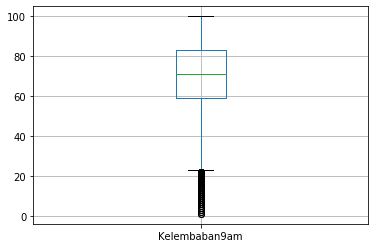

In [85]:
df_train_final.boxplot(column = ['Kelembaban9am'])

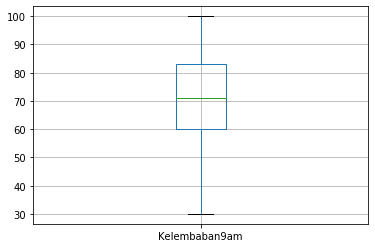

In [86]:
df_train_final.drop(df_train_final[df_train_final['Kelembaban9am'] < 30].index ,inplace =True)
df_train_final.boxplot(column = ['Kelembaban9am'])

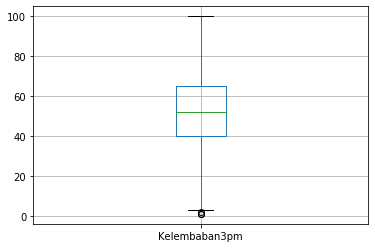

In [87]:
df_train_final.boxplot(column = ['Kelembaban3pm'])

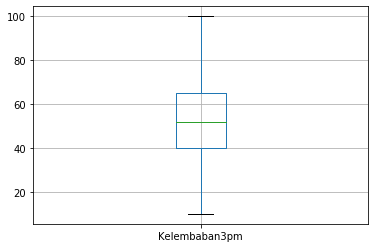

In [88]:
df_train_final.drop(df_train_final[df_train_final['Kelembaban3pm'] < 10].index ,inplace =True)
df_train_final.boxplot(column = ['Kelembaban3pm'])

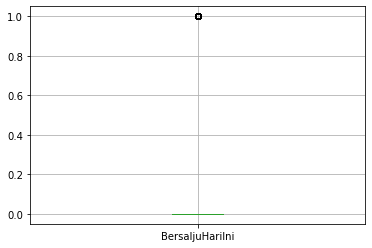

In [89]:
df_train_final.boxplot(column = ['BersaljuHariIni'])

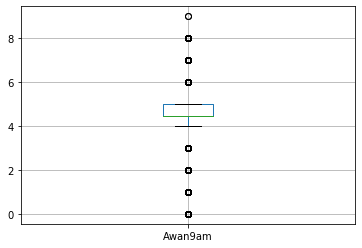

In [90]:
df_train_final.boxplot(column = ['Awan9am'])

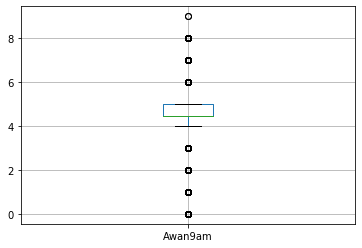

In [91]:
df_train_final.drop(df_train_final[((df_train_final['Awan9am'] > 8) & (df_train_final['Awan9am'] < 2.5))].index ,inplace =True)
df_train_final.boxplot(column = ['Awan9am'])

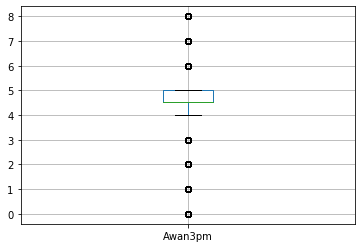

In [92]:
df_train_final.boxplot(column = ['Awan3pm'])

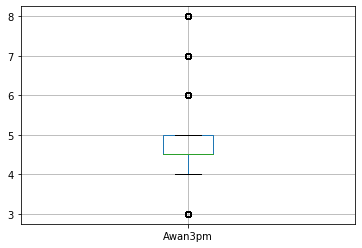

In [93]:
df_train_final.drop(df_train_final[((df_train_final['Awan3pm'] < 3) | (df_train_final['Awan3pm'] > 8))].index ,inplace =True)
df_train_final.boxplot(column = ['Awan3pm'])

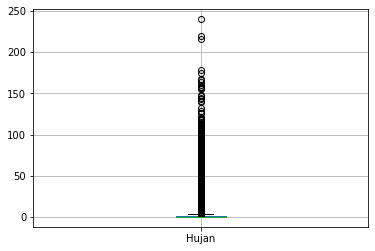

In [94]:
df_train_final.boxplot(column = ['Hujan'])

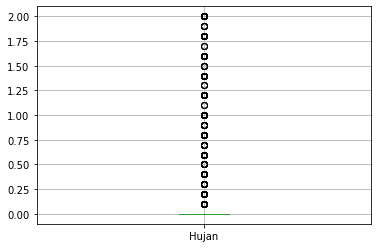

In [95]:
df_train_final.drop(df_train_final[df_train_final['Hujan'] > 2].index ,inplace =True)
df_train_final.boxplot(column = ['Hujan'])

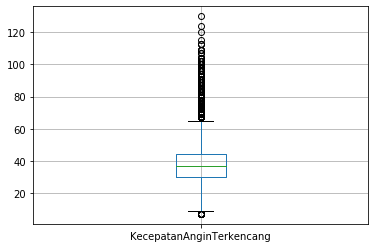

In [96]:
df_train_final.boxplot(column = ['KecepatanAnginTerkencang'])

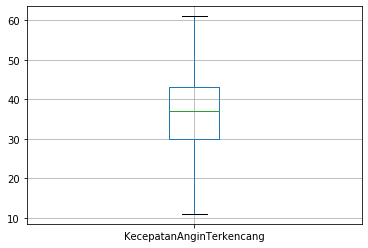

In [97]:
df_train_final.drop(df_train_final[((df_train_final['KecepatanAnginTerkencang'] > 61) | (df_train_final['KecepatanAnginTerkencang'] < 10))].index ,inplace =True)
df_train_final.boxplot(column = ['KecepatanAnginTerkencang'])

In [98]:
df_train_final.shape

(44042, 11)

**TEST DATA**

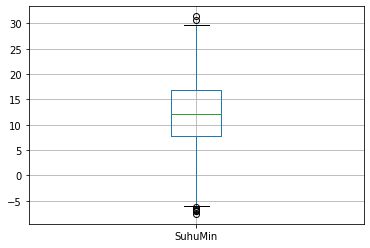

In [99]:
df_test_final.boxplot(column = ['SuhuMin'])

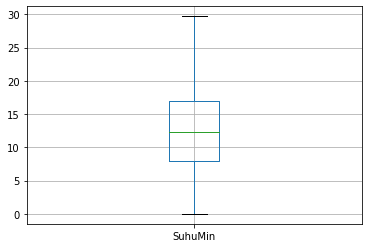

In [100]:
df_test_final.drop(df_test_final[((df_test_final['SuhuMin'] > 30) | (df_test_final['SuhuMin'] < 0))].index ,inplace =True)
df_test_final.boxplot(column = ['SuhuMin'])

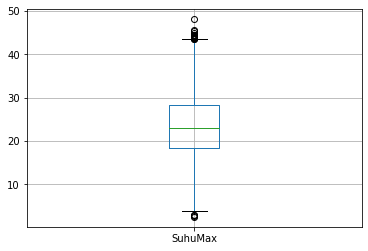

In [101]:
df_test_final.boxplot(column = ['SuhuMax'])

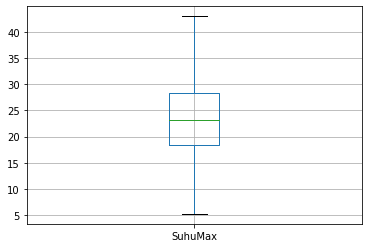

In [102]:
df_test_final.drop(df_test_final[((df_test_final['SuhuMax'] > 43) | (df_test_final['SuhuMax'] < 5))].index ,inplace =True)
df_test_final.boxplot(column = ['SuhuMax'])

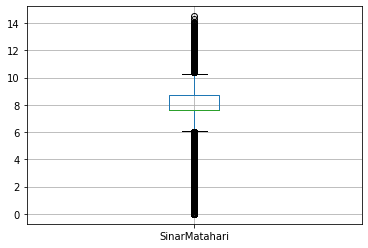

In [103]:
df_test_final.boxplot(column = ['SinarMatahari'])

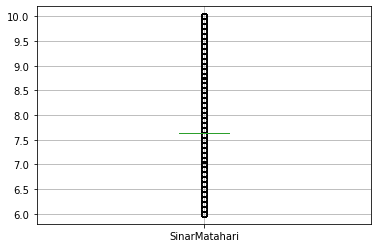

In [104]:
df_test_final.drop(df_test_final[((df_test_final['SinarMatahari'] > 10) | (df_test_final['SinarMatahari'] < 6))].index ,inplace =True)
df_test_final.boxplot(column = ['SinarMatahari'])

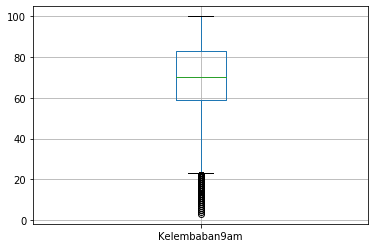

In [105]:
df_test_final.boxplot(column = ['Kelembaban9am'])

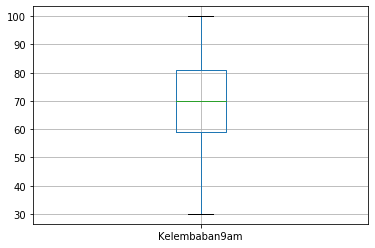

In [106]:
df_test_final.drop(df_test_final[df_test_final['Kelembaban9am'] < 20].index ,inplace =True)
df_train_final.boxplot(column = ['Kelembaban9am'])

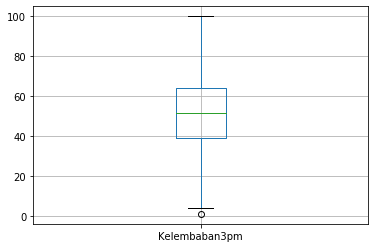

In [107]:
df_test_final.boxplot(column = ['Kelembaban3pm'])

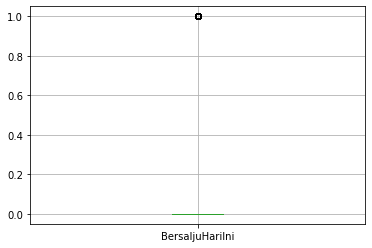

In [108]:
df_train_final.boxplot(column = ['BersaljuHariIni'])

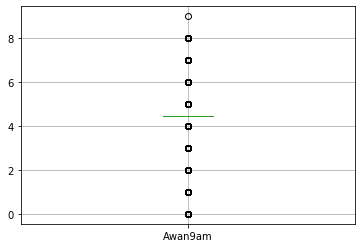

In [109]:
df_train_final.boxplot(column = ['Awan9am'])

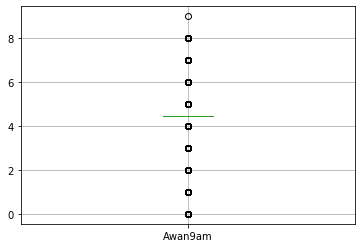

In [110]:
df_test_final.drop(df_test_final[((df_test_final['Awan9am'] < 3) | df_test_final['Awan9am'] > 8)].index ,inplace =True)
df_train_final.boxplot(column = ['Awan9am'])

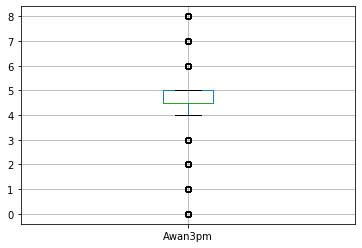

In [111]:
df_test_final.boxplot(column = ['Awan3pm'])

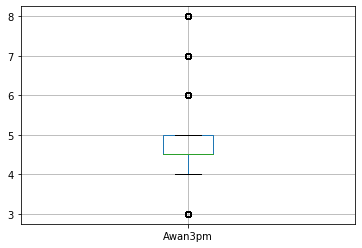

In [112]:
df_test_final.drop(df_test_final[df_test_final['Awan3pm'] < 1].index ,inplace =True)
df_train_final.boxplot(column = ['Awan3pm'])

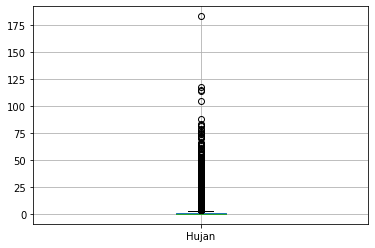

In [113]:
df_test_final.boxplot(column = ['Hujan'])

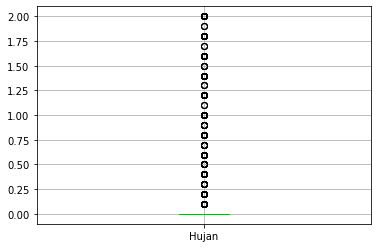

In [114]:
df_test_final.drop(df_test_final[df_test_final['Hujan'] > 0.40].index ,inplace =True)
df_train_final.boxplot(column = ['Hujan'])

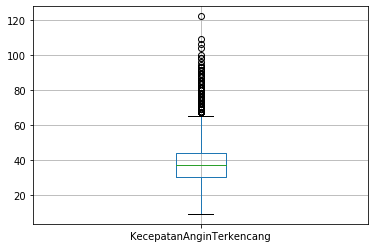

In [115]:
df_test_final.boxplot(column = ['KecepatanAnginTerkencang'])

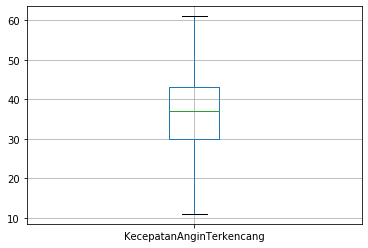

In [116]:
df_test_final.drop(df_test_final[((df_test_final['KecepatanAnginTerkencang'] > 70) | (df_test_final['KecepatanAnginTerkencang'] < 5))].index ,inplace =True)
df_train_final.boxplot(column = ['KecepatanAnginTerkencang'])

In [117]:
df_test_final.shape

(7882, 11)

**WRITE PROCESSED VALUE**

**Save Data Without Scalling**

In [118]:
col_new = ['SuhuMin','SuhuMax','SinarMatahari','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang','BersaljuBesok']
df_train_final = pd.DataFrame(df_train_final,columns=col_new)
df_test_final  = pd.DataFrame(df_test_final ,columns=col_new)

In [119]:
df_train_final.to_csv('processed_salju_train_notScaled.csv')
df_test_final.to_csv('processed_salju_test_notScaled.csv')

**Scaling Before Write Processed CSV**

Lakukan Scalling agar persebaran dari data tidak berbeda satu dengan yang lain dan lebih seragam menggunakan MinMaxScaler()

In [120]:
mms = MinMaxScaler()
df_train_final = mms.fit_transform(df_train_final)
df_test_final = mms.fit_transform(df_test_final)

In [121]:
col_new = ['SuhuMin','SuhuMax','SinarMatahari','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang','BersaljuBesok']
df_train_final = pd.DataFrame(df_train_final,columns=col_new)
df_test_final  = pd.DataFrame(df_test_final ,columns=col_new)

Simpan data untuk digunakan nanti di klasifikasi (Tahap 2)

In [122]:
df_train_final.to_csv('processed_salju_train.csv')
df_test_final.to_csv('processed_salju_test.csv')

# CLASSIFICATION BERSALJU BESOK

## DATA DI SCALLING

Menggunakan Decision Tree Classification

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [13]:
df_train_x = pd.read_csv('processed_salju_train.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_train_y = pd.read_csv('processed_salju_train.csv',usecols=['BersaljuBesok'])
df_test_x = pd.read_csv('processed_salju_test.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_test_y = pd.read_csv('processed_salju_test.csv',usecols=['BersaljuBesok'])

In [16]:
df_train_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang
0,0.612795,0.457143,0.355556,0.0,0.494544,0.303228,0.0,0.66000
1,0.414141,0.657143,0.777778,0.0,0.888889,0.800000,0.0,0.58064
2,0.218855,0.500000,0.622222,0.0,0.494544,0.303228,0.0,0.56000
3,0.313131,0.742857,0.400000,0.0,0.555556,0.400000,0.0,0.56000
4,0.360269,0.614286,0.355556,0.0,0.494544,0.303228,0.1,0.64000


In [17]:
df_train_y.head()

,BersaljuBesok
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [18]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(df_train_x.astype(int),df_train_y.astype(int))

DecisionTreeClassifier(max_depth=3)

Menggunakan Decision Tree yang Depthnya Maksimum 3 Karena Hasil dari Validasinya Optimum dengan kedalaman Maksimum 3, karena bila dinaikan atau di turunkan nilai validasi F1-Score, Recall, Precision, dan Akurasi Mengalami penurunan

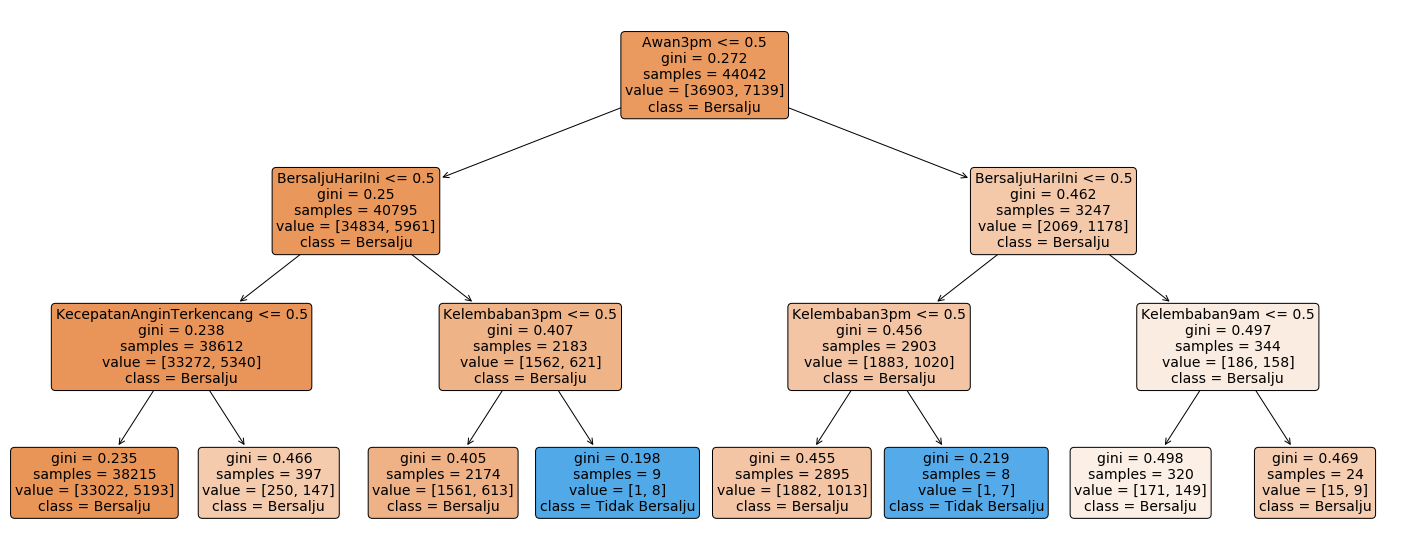

In [19]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=df_train_x.columns, 
              class_names=['Bersalju','Tidak Bersalju'],
              filled=True, 
              rounded=True, 
              fontsize=14)

Buat Prediksi Baik Untuk Train dan Test Digunakan Untuk Menunjukkan apakah terjadi Overfitting atau Underfitting 

In [20]:
y_train_pred = classifier.predict(df_train_x)

In [21]:
y_pred = classifier.predict(df_test_x)

**Validasi Training Set**

In [22]:
model_acc = accuracy_score(df_train_y.astype(int),y_train_pred)
print(model_acc*100)

80.03042550292902


In [23]:
cm = confusion_matrix(df_train_y, y_train_pred)
print(cm)

[[33207  3696]
 [ 5099  2040]]


In [24]:
print(classification_report(df_train_y.astype(int),y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     36903
           1       0.36      0.29      0.32      7139

    accuracy                           0.80     44042
   macro avg       0.61      0.59      0.60     44042
weighted avg       0.78      0.80      0.79     44042



**Validasi Test Set**

In [25]:
acc = accuracy_score(df_test_y.astype(int), y_pred)
print(acc*100)

81.19766556711494


In [26]:
cm = confusion_matrix(df_test_y, y_pred)
print(cm)

[[6075  711]
 [ 771  325]]


In [27]:
print(classification_report(df_test_y.astype(int), y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6786
           1       0.31      0.30      0.30      1096

    accuracy                           0.81      7882
   macro avg       0.60      0.60      0.60      7882
weighted avg       0.81      0.81      0.81      7882



Menggunakan Naive Bayes

In [17]:
df_train_x = pd.read_csv('processed_salju_train.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_train_y = pd.read_csv('processed_salju_train.csv',usecols=['BersaljuBesok'])
df_test_x = pd.read_csv('processed_salju_test.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_test_y = pd.read_csv('processed_salju_test.csv',usecols=['BersaljuBesok'])

Inisialisasi Classifier dan Latih Model

In [18]:
classifier = GaussianNB()
classifier.fit(df_train_x,df_train_y)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

Buat Prediksi Baik pada Training dan Test digunakan untuk melakukan validasi apakah proses yang dilakukan sudah baik dan benar

**Validasi Training Set**

In [19]:
y_train_pred = classifier.predict(df_train_x)

In [20]:
model_acc = accuracy_score(df_train_y,y_train_pred)
print(model_acc*100)

81.59484128786158


In [21]:
cm = confusion_matrix(df_train_y, y_train_pred)
print(cm)

[[33839  3064]
 [ 5042  2097]]


In [22]:
print(classification_report(df_train_y,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     36903
         1.0       0.41      0.29      0.34      7139

    accuracy                           0.82     44042
   macro avg       0.64      0.61      0.62     44042
weighted avg       0.80      0.82      0.80     44042



**Validasi Test Set**

In [23]:
y_pred = classifier.predict(df_test_x)

In [24]:
acc = accuracy_score(df_test_y, y_pred)
print(acc*100)

83.63359553412839


In [25]:
cm = confusion_matrix(df_test_y, y_pred)
print(cm)

[[6257  529]
 [ 761  335]]


In [26]:
print(classification_report(df_test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      6786
         1.0       0.39      0.31      0.34      1096

    accuracy                           0.84      7882
   macro avg       0.64      0.61      0.62      7882
weighted avg       0.82      0.84      0.83      7882



**Karena Menggunakan Naive Bayes Optimum Kita Print Hasilnya**

In [27]:
df_train_x['bersalju_besok'] = pd.DataFrame(df_train_y)
df_train_x["prediction"] = y_train_pred 
df_train_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,bersalju_besok,prediction
0,0.612795,0.457143,0.355556,0.0,0.494544,0.303228,0.0,0.66000,0.0,0.0
1,0.414141,0.657143,0.777778,0.0,0.888889,0.800000,0.0,0.58064,1.0,1.0
2,0.218855,0.500000,0.622222,0.0,0.494544,0.303228,0.0,0.56000,0.0,0.0
3,0.313131,0.742857,0.400000,0.0,0.555556,0.400000,0.0,0.56000,0.0,0.0
4,0.360269,0.614286,0.355556,0.0,0.494544,0.303228,0.1,0.64000,0.0,0.0


In [28]:
df_test_x['bersalju_besok'] = df_test_y
df_test_x["prediction"] = y_pred 
df_test_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,bersalju_besok,prediction
0,0.370370,0.2375,0.555556,0.0,0.500000,0.857143,0.0,0.606557,0.0,0.0
1,0.336700,0.7000,0.313131,0.0,1.000000,0.000000,0.5,0.770492,1.0,0.0
2,0.595960,0.4375,0.404040,0.0,0.875000,0.714286,0.0,0.426230,0.0,0.0
3,0.619529,0.6875,0.717172,0.0,0.556228,0.499760,0.5,0.491803,0.0,1.0
4,0.353535,0.5750,0.313131,0.0,0.556228,0.499760,0.0,0.491803,0.0,0.0


In [29]:
df_train_final = pd.DataFrame(df_train_x)
df_test_final  = pd.DataFrame(df_test_x)
df_train_final.to_csv("hasil_klasifikasi_train_bersaljubesok.csv")
df_test_final.to_csv("hasil_klasifikasi_test_bersaljubesok.csv")

## DATA TIDAK DI SCALLING

In [30]:
df_train_x = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_train_y = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['BersaljuBesok'])
df_test_x = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_test_y = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['BersaljuBesok'])

In [31]:
df_train_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang
0,18.2,62.0,42.0,0,4.450893,4.51614,0.0,44.000000
1,12.3,76.0,80.0,0,8.000000,7.00000,0.0,40.032002
2,6.5,65.0,66.0,0,4.450893,4.51614,0.0,39.000000
3,9.3,82.0,46.0,0,5.000000,5.00000,0.0,39.000000
4,10.7,73.0,42.0,0,4.450893,4.51614,0.2,43.000000


In [32]:
df_test_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang
0,11.0,39.0,56.0,0,4.00000,7.000000,0.0,46.0
1,10.0,76.0,32.0,0,8.00000,1.000000,0.2,56.0
2,17.7,55.0,41.0,0,7.00000,6.000000,0.0,35.0
3,18.4,75.0,72.0,0,4.44982,4.498322,0.2,39.0
4,10.5,66.0,32.0,0,4.44982,4.498322,0.0,39.0


Menggunakan Decision Tree Classification 

In [33]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(df_train_x.astype(int),df_train_y.astype(int))

DecisionTreeClassifier(max_depth=3)

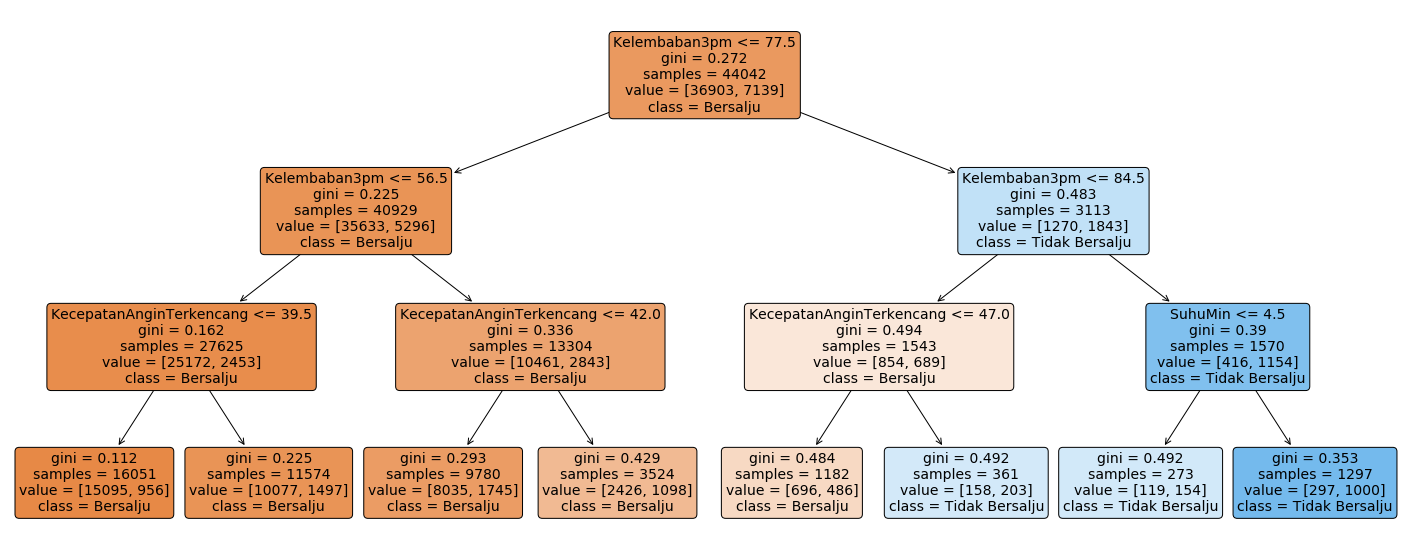

In [34]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=df_train_x.columns, 
              class_names=['Bersalju','Tidak Bersalju'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [35]:
y_train_pred = classifier.predict(df_train_x)

In [36]:
y_pred = classifier.predict(df_test_x)

**Validasi Training Set**

In [37]:
model_acc = accuracy_score(df_train_y.astype(int),y_train_pred)
print(model_acc*100)

85.56832114799509


In [38]:
cm = confusion_matrix(df_train_y, y_train_pred)
print(cm)

[[36329   574]
 [ 5782  1357]]


In [39]:
print(classification_report(df_train_y.astype(int),y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     36903
           1       0.70      0.19      0.30      7139

    accuracy                           0.86     44042
   macro avg       0.78      0.59      0.61     44042
weighted avg       0.84      0.86      0.82     44042



**Validasi Test Set**

In [40]:
acc = accuracy_score(df_test_y.astype(int), y_pred)
print(acc*100)

87.09718345597564


In [41]:
cm = confusion_matrix(df_test_y, y_pred)
print(cm)

[[6690   96]
 [ 921  175]]


In [42]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6786
           1       0.65      0.16      0.26      1096

    accuracy                           0.87      7882
   macro avg       0.76      0.57      0.59      7882
weighted avg       0.85      0.87      0.84      7882



**Karena Hasil Optimum Dapat Kita Print**

In [43]:
df_train_x['bersalju_besok'] = pd.DataFrame(df_train_y)
df_train_x["prediction"] = y_train_pred 
df_train_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,bersalju_besok,prediction
0,18.2,62.0,42.0,0,4.450893,4.51614,0.0,44.000000,0,0
1,12.3,76.0,80.0,0,8.000000,7.00000,0.0,40.032002,1,0
2,6.5,65.0,66.0,0,4.450893,4.51614,0.0,39.000000,0,0
3,9.3,82.0,46.0,0,5.000000,5.00000,0.0,39.000000,0,0
4,10.7,73.0,42.0,0,4.450893,4.51614,0.2,43.000000,0,0


In [44]:
df_test_x['bersalju_besok'] = df_test_y
df_test_x["prediction"] = y_pred 
df_test_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan,KecepatanAnginTerkencang,bersalju_besok,prediction
0,11.0,39.0,56.0,0,4.00000,7.000000,0.0,46.0,0,0
1,10.0,76.0,32.0,0,8.00000,1.000000,0.2,56.0,1,0
2,17.7,55.0,41.0,0,7.00000,6.000000,0.0,35.0,0,0
3,18.4,75.0,72.0,0,4.44982,4.498322,0.2,39.0,0,0
4,10.5,66.0,32.0,0,4.44982,4.498322,0.0,39.0,0,0


In [45]:
df_train_final = pd.DataFrame(df_train_x)
df_test_final  = pd.DataFrame(df_test_x)
df_train_final.to_csv("hasil_klasifikasi_train_bersaljubesok_notScaled.csv")
df_test_final.to_csv("hasil_klasifikasi_test_bersaljubesok_notScaled.csv")

Menggunakan Naive Bayes Gaussian 

In [46]:
df_train_x = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_train_y = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['BersaljuBesok'])
df_test_x = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan','KecepatanAnginTerkencang'])
df_test_y = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['BersaljuBesok'])

In [47]:
classifier = GaussianNB()
classifier.fit(df_train_x,df_train_y)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

**Validasi Training Set**

In [48]:
y_train_pred = classifier.predict(df_train_x)

In [49]:
model_acc = accuracy_score(df_train_y,y_train_pred)
print(model_acc*100)

81.59484128786158


In [50]:
cm = confusion_matrix(df_train_y, y_train_pred)
print(cm)

[[33839  3064]
 [ 5042  2097]]


In [51]:
print(classification_report(df_train_y,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     36903
           1       0.41      0.29      0.34      7139

    accuracy                           0.82     44042
   macro avg       0.64      0.61      0.62     44042
weighted avg       0.80      0.82      0.80     44042



**Validasi Test Set**

In [52]:
y_pred = classifier.predict(df_test_x)

In [53]:
acc = accuracy_score(df_test_y, y_pred)
print(acc*100)

86.1837097183456


In [54]:
cm = confusion_matrix(df_test_y, y_pred)
print(cm)

[[6592  194]
 [ 895  201]]


In [55]:
print(classification_report(df_test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6786
           1       0.51      0.18      0.27      1096

    accuracy                           0.86      7882
   macro avg       0.69      0.58      0.60      7882
weighted avg       0.83      0.86      0.83      7882



# CLASSIFICATION BERSALJU HARI INI

## DATA DI SCALLING

Menggunakan Decision Tree Classification

In [56]:
db_train_x = pd.read_csv('processed_salju_train.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_train_y = pd.read_csv('processed_salju_train.csv',usecols=['BersaljuHariIni'])
db_test_x = pd.read_csv('processed_salju_test.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_test_y = pd.read_csv('processed_salju_test.csv',usecols=['BersaljuHariIni'])

In [57]:
db_train_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan
0,0.457143,0.355556,0.494544,0.303228,0.0
1,0.657143,0.777778,0.888889,0.800000,0.0
2,0.500000,0.622222,0.494544,0.303228,0.0
3,0.742857,0.400000,0.555556,0.400000,0.0
4,0.614286,0.355556,0.494544,0.303228,0.1


In [58]:
db_train_y.head()

,BersaljuHariIni
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [59]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(db_train_x.astype(int),db_train_y.astype(int))

DecisionTreeClassifier(max_depth=3)

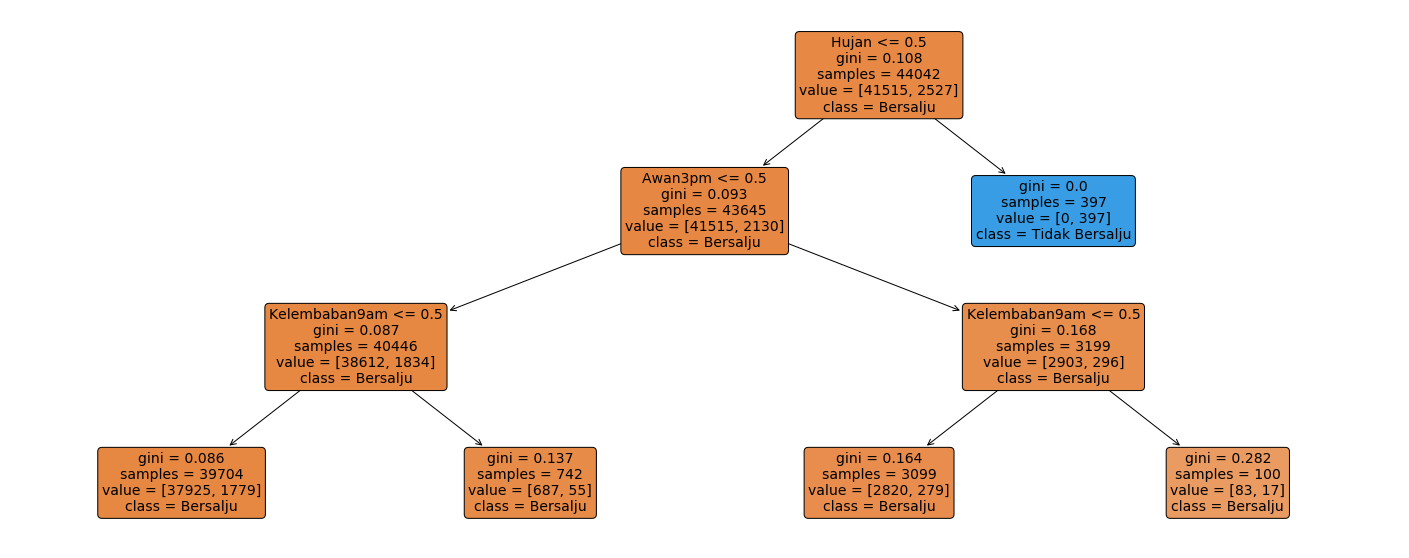

In [60]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=db_train_x.columns, 
              class_names=['Bersalju','Tidak Bersalju'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [61]:
y_train_pred = classifier.predict(db_train_x)

In [62]:
y_pred = classifier.predict(db_test_x)

**Validasi Training Set**

In [63]:
model_acc = accuracy_score(db_train_y,y_train_pred)
print(model_acc*100)

100.0


In [64]:
cm = confusion_matrix(db_train_y, y_train_pred)
print(cm)

[[41515     0]
 [    0  2527]]


In [65]:
print(classification_report(db_train_y, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41515
         1.0       1.00      1.00      1.00      2527

    accuracy                           1.00     44042
   macro avg       1.00      1.00      1.00     44042
weighted avg       1.00      1.00      1.00     44042



**Validasi Test Set**

In [66]:
acc = accuracy_score(db_test_y, y_pred)
print(acc*100)

96.2572951027658


In [67]:
cm = confusion_matrix(db_test_y, y_pred)
print(cm)

[[7587  295]
 [   0    0]]


In [68]:
print(classification_report(db_test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      7882
         1.0       0.00      0.00      0.00         0

    accuracy                           0.96      7882
   macro avg       0.50      0.48      0.49      7882
weighted avg       1.00      0.96      0.98      7882



C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Karena Hasilnya Optimum Bagian ini Dipilih untuk diprint**

In [69]:
db_train_x['bersalju_hari_ini'] = db_train_y
db_train_x["prediction"] = y_train_pred 
db_train_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan,bersalju_hari_ini,prediction
0,0.457143,0.355556,0.494544,0.303228,0.0,0.0,0
1,0.657143,0.777778,0.888889,0.800000,0.0,0.0,0
2,0.500000,0.622222,0.494544,0.303228,0.0,0.0,0
3,0.742857,0.400000,0.555556,0.400000,0.0,0.0,0
4,0.614286,0.355556,0.494544,0.303228,0.1,0.0,0


In [70]:
db_test_x['bersalju_hari_ini'] = db_test_y
db_test_x["prediction"] = y_pred 
db_test_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan,bersalju_hari_ini,prediction
0,0.2375,0.555556,0.500000,0.857143,0.0,0.0,0
1,0.7000,0.313131,1.000000,0.000000,0.5,0.0,0
2,0.4375,0.404040,0.875000,0.714286,0.0,0.0,0
3,0.6875,0.717172,0.556228,0.499760,0.5,0.0,0
4,0.5750,0.313131,0.556228,0.499760,0.0,0.0,0


In [71]:
df_train_final = pd.DataFrame(db_train_x)
df_test_final  = pd.DataFrame(db_test_x)
df_train_final.to_csv("hasil_klasifikasi_train_bersaljuhariini.csv")
df_test_final.to_csv("hasil_klasifikasi_test_bersaljuhariini.csv")

Menggunakan Naive Bayes Classification (Gaussian NB)

In [72]:
db_train_x = pd.read_csv('processed_salju_train.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_train_y = pd.read_csv('processed_salju_train.csv',usecols=['BersaljuHariIni'])
db_test_x = pd.read_csv('processed_salju_test.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_test_y = pd.read_csv('processed_salju_test.csv',usecols=['BersaljuHariIni'])

In [73]:
db_train_x = db_train_x.to_numpy()
db_train_y = db_train_y.to_numpy()
db_test_x = db_test_x.to_numpy()
db_test_y = db_test_y.to_numpy()

In [74]:
classifier = GaussianNB()
classifier.fit(db_train_x,db_train_y)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [75]:
y_train_pred = classifier.predict(db_train_x)
y_pred = classifier.predict(db_test_x)

**Validasi Training Set**

In [76]:
model_acc = accuracy_score(db_train_y,y_train_pred)
print(model_acc*100)

97.59774760455929


In [77]:
cm = confusion_matrix(db_train_y, y_train_pred)
print(cm)

[[40457  1058]
 [    0  2527]]


In [78]:
print(classification_report(db_train_y, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     41515
         1.0       0.70      1.00      0.83      2527

    accuracy                           0.98     44042
   macro avg       0.85      0.99      0.91     44042
weighted avg       0.98      0.98      0.98     44042



**Validasi Test Set**

In [79]:
acc = accuracy_score(db_test_y, y_pred)
print(acc*100)

87.2113676731794


In [80]:
cm = confusion_matrix(db_test_y, y_pred)
print(cm)

[[6874 1008]
 [   0    0]]


In [81]:
print(classification_report(db_test_y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      7882
         1.0       0.00      0.00      0.00         0

    accuracy                           0.87      7882
   macro avg       0.50      0.44      0.47      7882
weighted avg       1.00      0.87      0.93      7882



C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DATA TIDAK DISCALLING

Menggunakan Decision Tree 

In [82]:
db_train_x = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_train_y = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['BersaljuHariIni'])
db_test_x = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_test_y = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['BersaljuHariIni'])

In [83]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(db_train_x.astype(int),db_train_y.astype(int))

DecisionTreeClassifier(max_depth=5)

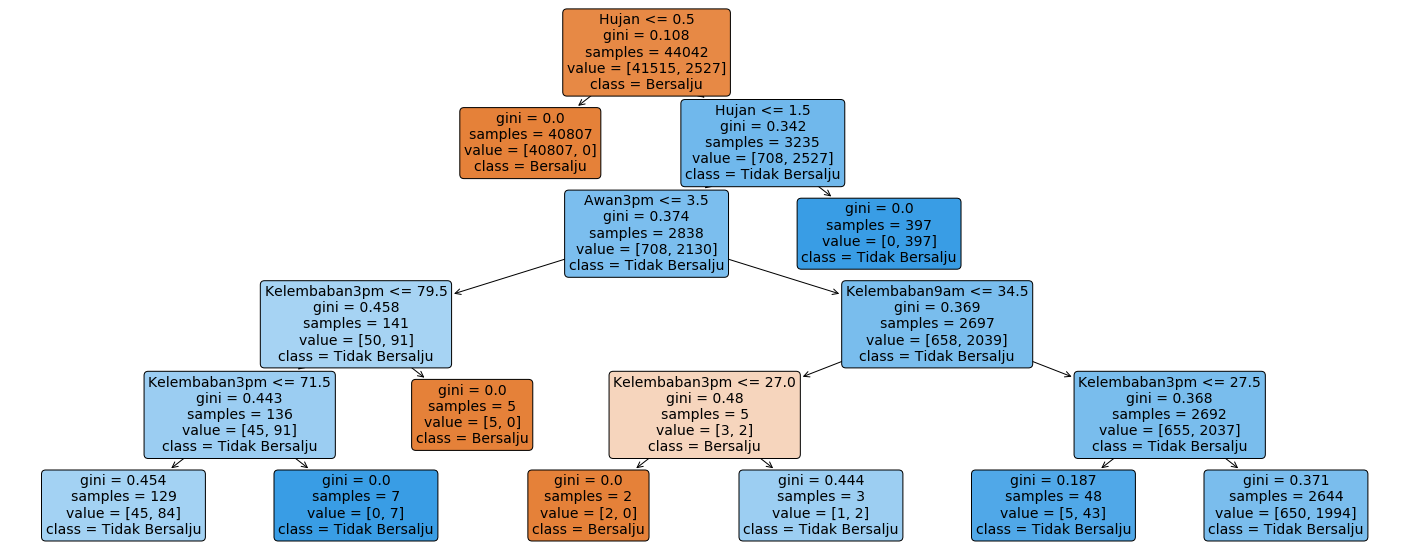

In [84]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=db_train_x.columns, 
              class_names=['Bersalju','Tidak Bersalju'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [85]:
y_train_pred = classifier.predict(db_train_x)
y_pred = classifier.predict(db_test_x)

**Validasi Training Set**

In [86]:
model_acc = accuracy_score(db_train_y,y_train_pred)
print(model_acc*100)

94.17374324508424


In [87]:
cm = confusion_matrix(db_train_y, y_train_pred)
print(cm)

[[38949  2566]
 [    0  2527]]


In [88]:
print(classification_report(db_train_y, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     41515
           1       0.50      1.00      0.66      2527

    accuracy                           0.94     44042
   macro avg       0.75      0.97      0.82     44042
weighted avg       0.97      0.94      0.95     44042



**Validasi Test Set**

In [89]:
acc = accuracy_score(db_test_y, y_pred)
print(acc*100)

100.0


In [90]:
cm = confusion_matrix(db_test_y, y_pred)
print(cm)

[[7882]]


In [91]:
print(classification_report(db_test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7882

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



Menggunakan Naive Bayes

In [92]:
db_train_x = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_train_y = pd.read_csv('processed_salju_train_notScaled.csv',usecols=['BersaljuHariIni'])
db_test_x = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
db_test_y = pd.read_csv('processed_salju_test_notScaled.csv',usecols=['BersaljuHariIni'])

In [93]:
classifier = GaussianNB()
classifier.fit(db_train_x,db_train_y)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [94]:
y_train_pred = classifier.predict(db_train_x)
y_pred = classifier.predict(db_test_x)

**Validasi Training Set**

In [95]:
model_acc = accuracy_score(db_train_y,y_train_pred)
print(model_acc*100)

97.59774760455929


In [96]:
cm = confusion_matrix(db_train_y, y_train_pred)
print(cm)

[[40457  1058]
 [    0  2527]]


In [97]:
print(classification_report(db_train_y, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     41515
           1       0.70      1.00      0.83      2527

    accuracy                           0.98     44042
   macro avg       0.85      0.99      0.91     44042
weighted avg       0.98      0.98      0.98     44042



**Validasi Test Set**

In [98]:
acc = accuracy_score(db_test_y, y_pred)
print(acc*100)

100.0


In [99]:
cm = confusion_matrix(db_test_y, y_pred)
print(cm)

[[7882]]


In [100]:
print(classification_report(db_test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7882

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



**Karena Hasil Algoritma Tanpa Scalling Optimum Menggunakan Naive Bayes Dapat di Print Hasilnya**

In [101]:
db_train_x['bersalju_hari_ini'] = pd.DataFrame(db_train_y)
db_train_x["prediction"] = y_train_pred 
db_train_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan,bersalju_hari_ini,prediction
0,62.0,42.0,4.450893,4.51614,0.0,0,0
1,76.0,80.0,8.000000,7.00000,0.0,0,0
2,65.0,66.0,4.450893,4.51614,0.0,0,0
3,82.0,46.0,5.000000,5.00000,0.0,0,0
4,73.0,42.0,4.450893,4.51614,0.2,0,0


In [102]:
db_test_x['bersalju_hari_ini'] = db_test_y
db_test_x["prediction"] = y_pred 
db_test_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan,bersalju_hari_ini,prediction
0,39.0,56.0,4.00000,7.000000,0.0,0,0
1,76.0,32.0,8.00000,1.000000,0.2,0,0
2,55.0,41.0,7.00000,6.000000,0.0,0,0
3,75.0,72.0,4.44982,4.498322,0.2,0,0
4,66.0,32.0,4.44982,4.498322,0.0,0,0


In [103]:
df_train_final = pd.DataFrame(db_train_x)
df_test_final  = pd.DataFrame(db_test_x)
df_train_final.to_csv("hasil_klasifikasi_train_bersaljuhariini_notScaled.csv")
df_test_final.to_csv("hasil_klasifikasi_test_bersaljuhariini_notScaled.csv")

## CEK SPLIT DATA OPTIMUM

**Note Ada Kemungkinan Error Bila Running Kembali Setelah Menjalankan Kode Dibawah Ini, Jadi Diharapkan Menyimpan Checkpoint atau Running Proses Klasifikasi Terlebih Dahulu**

Fungsi Pada Bagian ini adalah mengecek nilai split yang memiliki nilai akurasi yang baik, yang nantinya mungkin dapat digunakan untuk melakukan split bila ingin dilakukan optimasi, pada pengecekan akurasi digunakan decision tree 
untuk menghasilkan akurasi klasifikasi

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
split_test_size=[0.5,0.4,0.3,0.2]

Bersalju Hari Ini Atribut

In [4]:
df_cek_x = pd.read_csv('processed_salju_joined.csv',sep=";",usecols=['Kelembaban9am','Kelembaban3pm','Awan9am','Awan3pm','Hujan'])
df_cek_y = pd.read_csv('processed_salju_joined.csv',sep=";",usecols=['BersaljuHariIni'])

In [5]:
df_cek_x.head()

,Kelembaban9am,Kelembaban3pm,Awan9am,Awan3pm,Hujan
0,0.457143,0.355556,0.494544,0.303228,0.0
1,0.657143,0.777778,0.888889,0.800000,0.0
2,0.500000,0.622222,0.494544,0.303228,0.0
3,0.742857,0.400000,0.555556,0.400000,0.0
4,0.614286,0.355556,0.494544,0.303228,0.1


In [7]:
bestAccuracy = 0
bestIndex = 0
i = 0
for x in split_test_size:
    x_train, x_test, y_train, y_test = train_test_split(df_cek_x, df_cek_y, test_size=x, random_state=1)
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    accuracy_check = (accuracy_score(y_test, y_pred)*100) 
    print(str(split_test_size.index(x))+" Dengan Akurasi : "+str(accuracy_check))
    if accuracy_check > bestAccuracy :
        bestAccuracy = accuracy_check
        bestIndex = split_test_size.index(x)

0 Dengan Akurasi : 99.83822509822048
1 Dengan Akurasi : 99.84593163216176
2 Dengan Akurasi : 99.82667864937733
3 Dengan Akurasi : 99.826673086182


In [8]:
print("Split Size Terbaik Untuk Dataset Adalah\nTrain : "+str((1-split_test_size[bestIndex])*100)+"%\nTest : "+str((split_test_size[bestIndex])*100)+"%")
print("Akurasi Dihasilkan : "+str(bestAccuracy))

Split Size Terbaik Untuk Dataset Adalah
Train : 60.0%
Test : 40.0%
Akurasi Dihasilkan : 99.84593163216176


Bersalju Besok Atribut

In [9]:
df_cek_x = pd.read_csv('processed_salju_joined.csv',sep=";",usecols=['SuhuMin','Kelembaban9am','Kelembaban3pm','BersaljuHariIni','Awan9am','Awan3pm','Hujan'])
df_cek_y = pd.read_csv('processed_salju_joined.csv',sep=";",usecols=['BersaljuBesok'])

In [10]:
df_cek_x.head()

,SuhuMin,Kelembaban9am,Kelembaban3pm,BersaljuHariIni,Awan9am,Awan3pm,Hujan
0,0.612795,0.457143,0.355556,0,0.494544,0.303228,0.0
1,0.414141,0.657143,0.777778,0,0.888889,0.800000,0.0
2,0.218855,0.500000,0.622222,0,0.494544,0.303228,0.0
3,0.313131,0.742857,0.400000,0,0.555556,0.400000,0.0
4,0.360269,0.614286,0.355556,0,0.494544,0.303228,0.1


In [11]:
bestAccuracy = 0
bestIndex = 0
for x in split_test_size:
    x_train, x_test, y_train, y_test = train_test_split(df_cek_x, df_cek_y, test_size=x, random_state=1)
    classifier = DecisionTreeClassifier(max_depth=3)
    classifier.fit(x_train,y_train)

    y_pred = classifier.predict(x_test)
    accuracy_check = (accuracy_score(y_test, y_pred)*100) 
    print(str(split_test_size.index(x))+" Dengan Akurasi : "+str(accuracy_check))
    if accuracy_check > bestAccuracy :
        bestAccuracy = accuracy_check
        bestIndex = split_test_size.index(x)

0 Dengan Akurasi : 85.81388182728602
1 Dengan Akurasi : 85.63312469908522
2 Dengan Akurasi : 85.90961612530492
3 Dengan Akurasi : 85.89311506981223


In [12]:
print("Split Size Terbaik Untuk Dataset Adalah\nTrain : "+str((1-split_test_size[bestIndex])*100)+"%\nTest : "+str((split_test_size[bestIndex])*100)+"%")
print("Akurasi Dihasilkan : "+str(bestAccuracy))

Split Size Terbaik Untuk Dataset Adalah
Train : 70.0%
Test : 30.0%
Akurasi Dihasilkan : 85.90961612530492
